In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg
import time
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from scipy.sparse.linalg import LinearOperator
import scipy

# Problem 1

## 30 pts

- Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? **Note:** to make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering.


- Let $A$ and $B$ be dense $n\times n$ matrices. Suggest an algorithm that calculates matrix-vector multiplication $(A\otimes B)x$ faster than in $\mathcal{O}(n^4)$ operations.


- Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- Let $x_{k+1} = x_{k} - \tau_k (Ax_k - f)$, $x_0$ is zero vector. Does $x_{k}\in \mathcal{K}_{k}(A,f)$ - the Krylov subspace? Can CG be represented in this form (i.e. there exists $\tau_k$ such that $x_{k+1}$ generated by the sequence above and the CG method are equal for any $k$)?


- Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter
    - Chebyshev iteration
    - Conjugate gradient method

## Solution

1) Consider the $k$-th column of $AXB$:

$$(AXB)_{:,k} = AX\overline{b_k} = A\sum_{i=1}^m\overline{x_i}b_{ik} = \begin{bmatrix}
b_{1k}A & b_{2k}A & \dots & b_{mk}A  
\end{bmatrix}\cdot\begin{bmatrix}
\overline{x_1}\\
\overline{x_2}\\
\vdots\\
\overline{x_m}
\end{bmatrix} = \left[\overline{b}_k^T\otimes A\right]\cdot\begin{bmatrix}
\overline{x_1}\\
\overline{x_2}\\
\vdots\\
\overline{x_m}
\end{bmatrix}$$

where $\overline{x_i}, \overline{b_j}$ are columns of matriced $X$ and $B$, resp, i.e. $B = [\overline{b_1},\dots,\overline{b_n}]$, $X = [\overline{x_1},\dots,\overline{x_m}]$. So we see that

$$(B^T\otimes A)vec(X) = vec(AXB)$$

2) Let $x$ be a vector form of some matrix, i.e $x = vec(X)$, then

$$(A\otimes B)x = BXA^T$$

this multiplication can be computed less than in $\mathcal{O}(n^3)$.

3) Let $\{u_1, \dots, u_m\}$. $\{v_1, \dots, v_n\}$ be sets of eigenvectors of $A$ and $B$ with $\{\lambda_1, \dots, \lambda_m\}$, $\{\mu_1, \dots, \mu_m\}$. It can be easily see that $u_i\otimes v_j$ is an eigenvector of $A\otimes I + I\otimes B$ with eigenvalue $\lambda_i + \mu_j$. Indeed,

$$(A\otimes I + I\otimes B)\cdot(u_i\otimes v_j) = Au_i\otimes v_j + u_i\otimes Bv_j = \lambda_iu_i\otimes v_j + u_i\otimes \mu_jv_j = \lambda_i(u_i\otimes v_j) + \mu_j(u_i\otimes v_j) = (\lambda_i + \mu_j)\cdot(u_i\otimes v_j)$$

Hence $\Lambda_{A\otimes I + I\otimes B} = \Lambda_A\otimes I + I\otimes \Lambda_B$ and $S_{A\otimes I + I\otimes B} = S_A\otimes S_B$.

4) Note that $x_0\in \mathcal{K}_0(A, f)$ and $x_1 = \tau_0f\in\mathcal{K}_1(A, f)$. Assume that $x_k\in\mathcal{K}_k(A, f)$. Then, obviously, $Ax_k\in\mathcal{K}_{k+1}(A, f)$, hence $x_{k+1} = -\tau_kAx_k + x_k +\tau_kf$, obviously, contains in $\mathcal{K}_{k+1}(A, f)$


5) **Richardson iteration with optimal parameter** 

We know that the optimal value of $\tau = \frac{2}{\lambda_\text{max} + \lambda_\text{min}} = \frac{2}{1000.0001}$. In this case error $e_k = x_k - x_*$ can be expressed in terms of $e_0$ as follows

$$e_k = (I-\tau A)^ke_0$$

We want to make relative error $e_k\leq10^{-4}$, so

$$\|e_k\|\leq\|I-\tau A\|^k\|e_0\|\leq 10^{-4}\Rightarrow k\leq\frac{\log(10^{-4}\|e_0\|^{-1})}{\log\|I-\tau A\|}$$

So we need at most $\frac{\log(10^{-4}\|e_0\|^{-1})}{\log\|I-\tau A\|}$ iterations.

**Chebyshev iteration**

Here $\text{cond}(A) = \frac{|\lambda_\text{max}|}{|\lambda_\text{min}| }= 10^6$. We know from lectures the following inequality for relative errors

$$
\frac{\| x_k - x_* \|_A}{\|x_*\|_A} \leq \gamma \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)^k \leq 10^{-4} \implies k \leq \frac{\log (10^{-4}\gamma^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}
$$

So we need at most $\frac{\log (10^{-4}\gamma^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}$ iterations.

**CG**

We have the same inequality for CG as for Chebyshev iteration method.

$$
\frac{\| x_k - x_* \|_A}{\|x_*\|_A} \leq \gamma \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)^k \leq 10^{-4} \implies k \leq \frac{\log (10^{-4}\gamma^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}
$$

# Problem 2

## 40 pts

### Sparse systems


Consider a 2D Poisson equation in $\Omega = [0,1]^2$
$$
\Delta u \equiv \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x,y), \quad (x,y)\in \Omega
$$ 
with zero Dirichlet boundary conditions
$$
u_{\partial \Omega} = 0,
$$
with known function $f(x,y)$ and unknown $u(x,y)$.

To find solution of the Poisson equation we will use the **finite difference method**. Standard second order finite difference discretization on a uniform grid $(x_i, y_j) = (ih, jh)$, $i,j = 0,\dots, N$, $h = \frac{1}{N}$ leads to the following system of equations:
$$
\begin{split}
   &\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} = f(ih, jh) \\
   &u_{0,j} = u_{i,0} = u_{N,j} = u_{i,N} = 0, \quad i,j = 0,\dots,N
\end{split}
$$

* Write the system above as a matrix equation $BU_h + U_h C = F_h$ with  matrices $U_h = \begin{bmatrix}u_{1,1} & \dots & u_{1,N-1} \\ \vdots & \ddots & \vdots \\ u_{N-1,1} & \dots & u_{N-1,N-1} \end{bmatrix}$, $F_h = \begin{bmatrix}f_{1,1} & \dots & f_{1,N-1} \\ \vdots & \ddots & \vdots \\ f_{N-1,1} & \dots & f_{N-1,N-1} \end{bmatrix}$. What are matrices $B$ and $C$? Show that they are negative definite.


* Using Kronecker product properties rewrite $ BU_h + U_h C = F_h$ as $A_h \mathrm{vec}(U_h) = \mathrm{vec}(F_h)$, where $\mathrm{vec}(\cdot)$ is a columnwise reshape.
What is matrix $A_h$?


* Choose $f(x,y)$ such that $u(x, y) = \sin\pi x \sin \pi y$ is a solution (just substitute $u$ in the Poisson equation and find $f$, then pretend as if you do not know the solution $u$). Solve the system with the found $f$ using the `scipy.sparse.linalg.spsolve` which is direct sparse solver. Use ```pandas``` library and print table that contains $N$, time, relative error between the analytic solution and the obtained one for $N=128,256,512$. Matrices $B, C$ and $A_h$ should be assembled in the `CSR` format using functions from the `scipy.sparse` package (functions `scipy.sparse.kron` and `scipy.sparse.spdiags` will be helpful). <font color='red'> Do not use full matrices! Use only sparse arithmetics. </font>

* What is the iterative method of choice  among `cg`, `minres`, `GMRES`, `BicgStab`? Explain why. 



* Run the method from the previous task with and without ILU0 preconditioner for $N=256$. Plot relative error w.r.t. iteration number for both cases on one plot.

### Eigenvalues

* Find $3$ smallest eigenvalues of matrices $B$ and $C$ using ```scipy.sparse.linalg.eigs``` (Implicitly Restarted Arnoldi Method) or if $B$ and $C$ are Hermitian using ```scipy.sparse.linalg.eigsh``` (Implicitly Restarted Lanczos Method). Print them.


* What are the first $3$ smallest distinct eigenvalues of $A_h$ in terms of eigenvalues of $B$ and $C$? What are their multiplicities (explain the answer)? Find these eigenvalues numerically using ```scipy.sparse.linalg.eigsh``` and compare them with what you have found using eigenvalues of $B$ and $C$.


* **Bonus:** Find analytically eigenvalues of the matrix $A_h$ and prove that $\text{cond}( A_h )= \mathcal{O}\left(\frac{1}{h^2}\right)$

## Solution

1) It can be easily seen that $B = C = \frac{1}{h^2}T$, where $T = \text{tridiag}(1, -2, 1)$, so the equation can be rewritten as follows

$$TU_h + U_hT = h^2F_h$$

$T$ is negative definite, bacause  the corresponding quadratic form looks like

$$x^TTx = -2\sum_ix_i^2 + 2\sum_{i\neq j}x_ix_j = -\sum_i x_i^2 - \left(\sum_i x_i \right)^2 \leq 0,\ \forall x\in\mathbb{R}^n$$

2) $A_h = T\otimes I + I\otimes T$. Indeed, $A_h\cdot vec(U_h) = (T\otimes I + I\otimes T)\cdot vec(U_h) = (T\otimes I)\cdot vec(U_h) + (I\otimes T)\cdot vec(U_h) = U_hT + TU_h$

3) Substituting $u(x, y) = \sin(\pi x)\sin(\pi y)$ we obtain that $f(x, y) = -2\pi^2\sin(\pi x)\sin(\pi y)$

In [2]:
def poisson_fin_dif_method(N):
    start_time = time.time()
    
    h = 1.0 / N
    x, y = np.mgrid[h:1:h,h:1:h]
    F_h = -2 * np.pi ** 2 * np.sin(np.pi * x) * np.sin(np.pi * y)
    # print F_h.shape

    vec_F_h = np.reshape(F_h, (N-1) ** 2, order='f')
    I = np.identity(N-1)

    values = [[1] * (N-2), [-2] * (N-1), [1] * (N-2)]
    diagonals = [-1, 0, 1]
    T = sparse.diags(values, diagonals)
    A_h = sparse.kron(T, I) + sparse.kron(I, T)

    U_h = sparse.linalg.spsolve(A_h, h ** 2 * vec_F_h)
    
    run_time = time.time() - start_time
    U_h_analytic = np.sin(np.pi * x) * np.sin(np.pi * y)
    rel_error = np.linalg.norm(U_h.reshape(N-1, N-1) - U_h_analytic) / np.linalg.norm(U_h_analytic)
    return run_time, rel_error

In [3]:
N = [128, 256, 512]
rel_errors = []
run_time = []

for n in N:
    sol_time, sol_err = poisson_fin_dif_method(n)
    run_time.append(sol_time)
    rel_errors.append(sol_err)

In [4]:
data = {}
for i in range(len(N)):
    data.update({'%s' % N[i]: pd.Series([run_time[i], rel_errors[i]], index=['Time', 'Relative error'])})
    
pd.DataFrame(data)

,128,256,512
Time,0.57200,1.145000,7.635000
Relative error,0.00005,0.000013,0.000003


4) Matrix $-T$ is positive definite and symmetric and we'll use CG.

In [7]:
N = 256
h = 1.0 / N
x, y = np.mgrid[h:1:h,h:1:h]
F_h = -2 * np.pi ** 2 * np.sin(np.pi * x) * np.sin(np.pi * y)
U_h_analytic = np.sin(np.pi * x) * np.sin(np.pi * y)

vec_F_h = np.reshape(F_h, (N-1) ** 2, order='f')
I = np.identity(N-1)

values = [[1] * (N-2), [-2] * (N-1), [1] * (N-2)]
diagonals = [-1, 0, 1]
T = sparse.diags(values, diagonals)
A_h = sparse.kron(T, I) + sparse.kron(I, T)
print type(A_h)

<class 'scipy.sparse.csr.csr_matrix'>


In [6]:
# without preconditioner
errors = []
def relative_error(x, U=U_h_analytic):
    errors.append(np.linalg.norm(x.reshape(N-1, N-1) - U) / np.linalg.norm(U))
    return np.linalg.norm(x.reshape(N-1, N-1) - U) / np.linalg.norm(U)


f = h ** 2 * vec_F_h

sol = sparse.linalg.cg(A_h, f, callback=relative_error, tol=1e-10)

In [9]:
# with preconditioner
errors_prec = []
def relative_error_prec(x, U=U_h_analytic):
    errors_prec.append(np.linalg.norm(x.reshape(N-1, N-1) - U) / np.linalg.norm(U))
    return np.linalg.norm(x.reshape(N-1, N-1) - U) / np.linalg.norm(U)

Preconditioner = LinearOperator(A_h.shape, matvec=sparse.linalg.spilu(A_h, fill_factor=1).solve)
f = h ** 2 * vec_F_h

sol = sparse.linalg.cg(A_h, f, callback=relative_error_prec, M=Preconditioner, maxiter=1000)

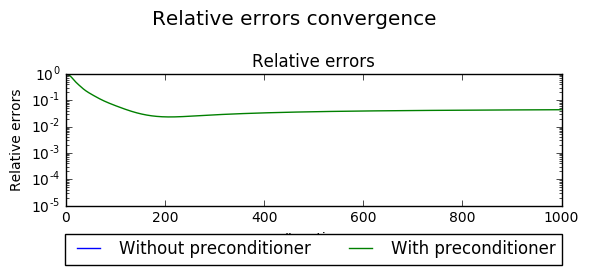

In [10]:
# Plots
fig = plt.figure()
title = fig.suptitle("Relative errors convergence", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(errors, label='Without preconditioner')
errplot.plot(errors_prec, label='With preconditioner')
errplot.set_title('Relative errors')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Relative errors')
errplot.set_yscale('log')
errplot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
fig.subplots_adjust(top=0.82)
plt.show()

Why sparse.linalg. for any method solves with one iteration??

### Eigenvalues

I choose $N=128$. I'll compute eigenvalues for matricies $T, T\otimes I + I\otimes T$ . For matrices $B=C=\frac{1}{h^2}T$ and $A_h$ eigenvalues are $\frac{1}{h^2}$ greater.

In [11]:
N = 128
h = 1.0 / N
I = np.identity(N-1)
values = [[1] * (N-2), [-2] * (N-1), [1] * (N-2)]
diagonals = [-1, 0, 1]
T = sparse.diags(values, diagonals)
A_h = sparse.kron(T, I) + sparse.kron(I, T)

Here is three smallest eigenvalues $\lambda_1, \lambda_2, \lambda_3$ of matrix $T$

In [12]:
T_eig = sparse.linalg.eigsh(T, k=3, return_eigenvectors=False)
T_eig = np.sort(T_eig)
print T_eig

[-3.99939764 -3.99759091 -3.99458091]


Here is three smallest sums of eigenvalues of $T$:

$$2\lambda_1, \lambda_1 + \lambda_2, 2\lambda_2$$

In [13]:
print '2*lambda_1 =', T_eig[0] * 2
print 'lambda_1 + lambda_2 =', T_eig[0] + T_eig[1]
print '2*lambda_2 =', T_eig[1] * 2

2*lambda_1 = -7.99879527478
lambda_1 + lambda_2 = -7.9969885498
2*lambda_2 = -7.99518182482


Let us find three smallest distinct eigenvalues $\mu_1, \mu_2, \mu_3$ of matrix $A_h = T\otimes I + I\otimes T$

In [14]:
A_h_eig = sparse.linalg.eigsh(A_h, k=4, return_eigenvectors=False)

In [15]:
A_h_eig = np.sort(A_h_eig)
print 'mu_1 =', A_h_eig[0]
print 'mu_2 =', A_h_eig[2]
print 'mu_3 =', A_h_eig[3]

mu_1 = -7.99879527478
mu_2 = -7.9969885498
mu_3 = -7.99518182482


We see that three smallest eigenvalues of $A_h$ are sums eigenvalues of matrix $T$.
$$\mu_1 = 2\lambda_1$$
$$\mu_2 = \lambda_1 + \lambda_2$$
$$\mu_3 = 2\lambda_2$$

# Problem 3

## 30 pts

### Structured matrices 

* Find convolution of the Lena image $n\times n$, $n=512$ with the following filter
$$
T_{i_1j_1,i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{100}
$$
using FFT. What is the complexity of this operation? Plot the result as an image.


* Write matvec function that produces multiplication of $T$ by a given vector $x$. Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape. 


* Run an appropriate Krylov method with the obtained Linear Operator and try to reconstruct Lena using the right-hand side from the first bullet (smoothed Lena). On one figure plot relative error  w.r.t. the number of iterations for  $\alpha=\frac{1}{50},\frac{1}{100},\frac{1}{200}$ and the corresponding right-hand side. Comment on the results.


* **Bonus:** Let $x\in\mathbb{R}^{n^2}$ being reshaped into a matrix of size $n\times n$ have rank $r$. Let also $T_{i_1j_1,i_2j_2} \equiv \widetilde T_{i_1-j_1,i_2-j_2}$ such that $n\times n$ matrix $\widetilde T_{i_1,i_2}$ has rank $R$.  Propose an algorithm that calculates $Tx$ using $\mathcal{O}((r+R)n\log n + rRn)$ operations.

In [3]:
def gen_block(N, alpha):
    T = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            T[i][j] = np.exp(-alpha * (i ** 2 + j **2 ))
    T = alpha / np.pi * T
    return T

In [4]:
def gen_toeplitz(N, a):
    # Array generating
    T = np.arange(N) 
    # Generating matrix Tij = |i-j|
    Tij = scipy.linalg.toeplitz(T) 
    # Matrix Tij = (i-j)^2
    Tij = Tij * Tij 
    # Requaired matrix
    Tij = np.sqrt(a / np.pi) * np.exp (- a * Tij)
    return Tij

In [6]:
lena = Image.open('lenaTest3.jpg')
lena_ar = np.asarray(lena)
plt.imshow(lena, cmap='gray')

In [7]:
(N, N) = lena_ar.shape
Tpltz = gen_block(N, 0.01)
conv_lena = np.fft.ifft2(np.fft.fft2(Tpltz) * np.fft.fft2(lena))
conv_lena = conv_lena.real

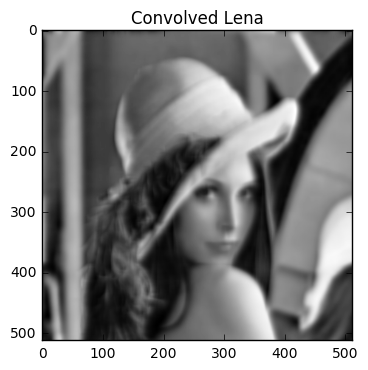

In [8]:
%matplotlib inline
plt.title('Convolved Lena')
plt.imshow(conv_lena, cmap="gray")

In our case $N=512=2^9$, so the complexity of FFT is $\mathcal{O}(N\log(N))$. Also we need to elementwise multiply matrices of, so the total complexity is $\mathcal{O}(N^2)$

In [9]:
alpha = [0.2, 0.01, 0.005]
conv_lena_alpha = []
TT = []
for i in range(3):
    toepl = gen_toeplitz(N, alpha[i])
    
    def TmatvT(v, T=toepl, N=N):
        v = np.reshape(v, (N, N), order = 'f')
        return T.dot(v.dot(T))
    
    TT.append(LinearOperator( (N**2 , N**2), matvec = TmatvT))
    lena_vec = lena_ar.reshape(-1, 1)
    conv_lena_alpha.append(TT[-1].dot(lena_vec))  

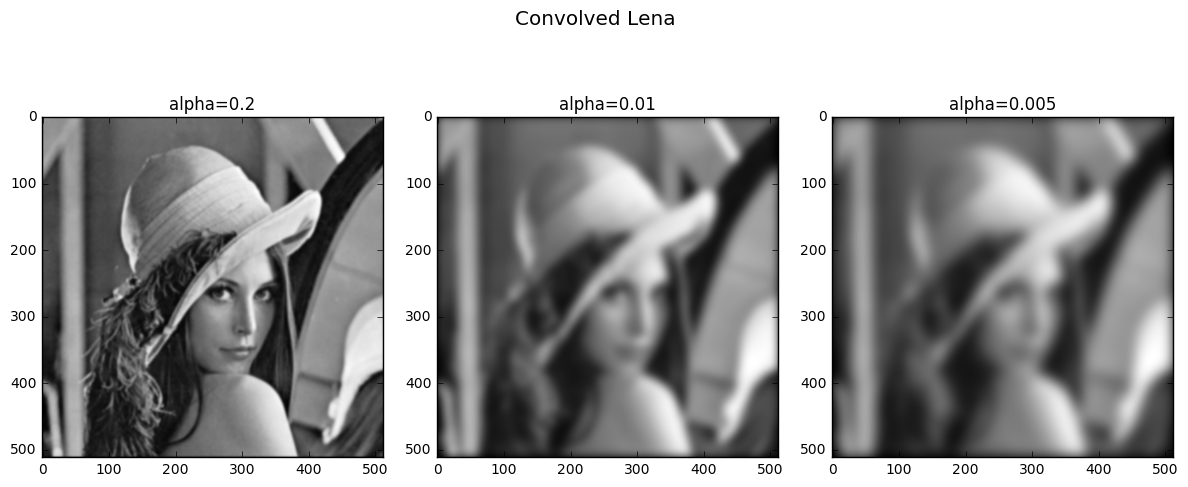

In [10]:
# Plots
fig = plt.figure(figsize =(12, 5))
title = fig.suptitle("Convolved Lena", fontsize="x-large")

lena1 = fig.add_subplot(1,3,1)
lena1.imshow(conv_lena_alpha[0].reshape(N,N).T, cmap='gray')
lena1.set_title('alpha=0.2')

lena2 = fig.add_subplot(1,3,2)
lena2.imshow(conv_lena_alpha[1].reshape(N,N).T, cmap='gray')
lena2.set_title('alpha=0.01')

lena3 = fig.add_subplot(1,3,3)
lena3.imshow(conv_lena_alpha[2].reshape(N,N).T, cmap='gray')
lena3.set_title('alpha=0.005')

plt.tight_layout()
fig.subplots_adjust(top=0.82)
plt.show()

In [11]:
MAX_ITER = 1000

Sorry for three one-to-one codes. I do that because of playing with different parameters. It is easier to do this in three cells :)

In [12]:
errors_lena_02 = []

def lena_errors(x, lena=lena_ar):
    errors_lena_02.append(np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena))
    return np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena)

solution_02 = sparse.linalg.minres(TT[0], conv_lena_alpha[0], callback=lena_errors, maxiter=MAX_ITER, tol=1e-10)

In [13]:
errors_lena_001 = []

def lena_errors(x, lena=lena_ar):
    errors_lena_001.append(np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena)) # print errors_prec[-1]
    return np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena)

solution_001 = sparse.linalg.minres(TT[1], conv_lena_alpha[1], callback=lena_errors, maxiter=MAX_ITER, tol=1e-10)

In [14]:
errors_lena_0005 = []

def lena_errors(x, lena=lena_ar):
    errors_lena_0005.append(np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena))
    return np.linalg.norm(x.reshape(lena.shape) - lena) / np.linalg.norm(lena)


solution_0005 = sparse.linalg.minres(TT[2], conv_lena_alpha[2], callback=lena_errors, maxiter=MAX_ITER, tol=1e-10)

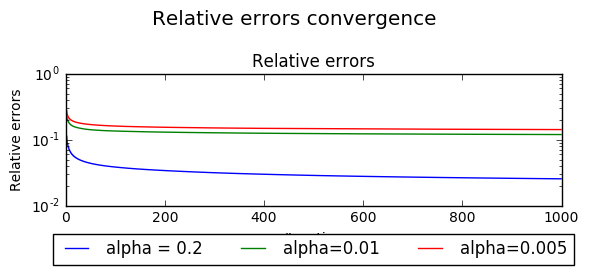

In [15]:
# Plots
fig = plt.figure()
title = fig.suptitle("Relative errors convergence", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(errors_lena_02, label='alpha = 0.2')
errplot.plot(errors_lena_001, label='alpha=0.01')
errplot.plot(errors_lena_0005, label='alpha=0.005')
errplot.set_title('Relative errors')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Relative errors')
errplot.set_yscale('log')
errplot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.tight_layout()
fig.subplots_adjust(top=0.82)
plt.show()

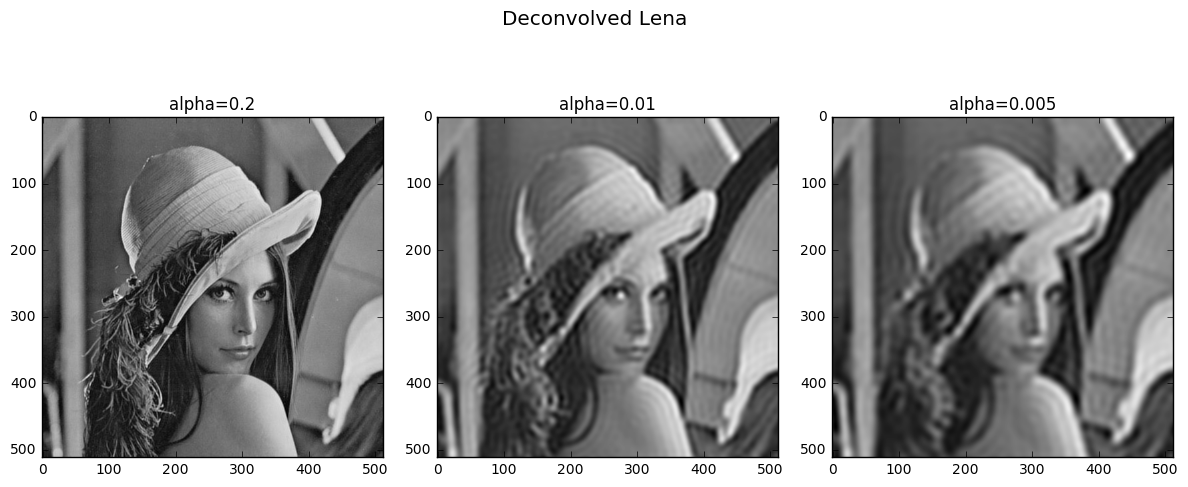

In [16]:
# Plots
fig = plt.figure(figsize =(12, 5))
title = fig.suptitle("Deconvolved Lena", fontsize="x-large")

lena1 = fig.add_subplot(1,3,1)
lena1.imshow(solution_02[0].reshape(N,N), cmap='gray')
lena1.set_title('alpha=0.2')

lena2 = fig.add_subplot(1,3,2)
lena2.imshow(solution_001[0].reshape(N,N), cmap='gray')
lena2.set_title('alpha=0.01')

lena3 = fig.add_subplot(1,3,3)
lena3.imshow(solution_0005[0].reshape(N,N), cmap='gray')
lena3.set_title('alpha=0.005')

plt.tight_layout()
fig.subplots_adjust(top=0.82)
plt.show()


In [17]:
errors_lena_02

[0.58676226544135257,
 0.11671826555150963,
 0.11416346959661915,
 0.088288462281872551,
 0.087415164737146139,
 0.076753894472758918,
 0.076231490839543434,
 0.069934469872890564,
 0.069545331084810105,
 0.065296999847717765,
 0.065052762564499308,
 0.061881632428438825,
 0.061697241562818625,
 0.059239936762421612,
 0.059080471156242265,
 0.057150538574038019,
 0.057019045766605145,
 0.055470899172158313,
 0.055352921374125959,
 0.054022464183856166,
 0.053915169172121039,
 0.052741001583325009,
 0.052656114889704175,
 0.051659185523082997,
 0.05159335079163601,
 0.050707938593988824,
 0.050647045315101571,
 0.049843452223304191,
 0.049787794480914305,
 0.049059672477077029,
 0.049004400637431375,
 0.048356729279176509,
 0.04830822826553649,
 0.047720428789090205,
 0.047674645968114722,
 0.047125896687544827,
 0.047085405136000513,
 0.046574231188479885,
 0.046533986302144684,
 0.046060262040143844,
 0.046019518316962667,
 0.045579006360677667,
 0.045545991699815998,
 0.0451332678265